In [49]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import KFold

In [50]:
df = pd.read_csv('all_data_combined.csv')
df.head()

,subject_id,age,urea_n_min,urea_n_max,urea_n_mean,resprate_min,resprate_max,resprate_mean,glucose_min,glucose_max,...,oasis,lods,gender_F,gender_M,marital_status_DIVORCED,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED,death
0,15057,58.831224,16.0,37.0,26.111111,10.0,52,20.104478,67.0,405.0,...,36.5,5.5,0,1,0,1,0,0,0,1
1,79262,81.618606,10.0,15.0,13.500000,11.0,31,18.704225,119.0,348.0,...,48.0,4.0,0,1,0,1,0,0,0,1
2,77191,79.102744,16.0,56.0,35.500000,20.0,31,25.744681,90.0,188.0,...,35.0,6.0,1,0,1,0,0,0,0,0
3,84966,88.232043,8.0,27.0,17.692308,10.0,51,17.770833,92.0,271.0,...,40.5,4.0,1,0,0,0,0,1,0,1
4,94997,90.000000,38.0,48.0,42.250000,4.0,40,26.360000,62.0,135.0,...,35.0,5.0,1,0,0,0,0,1,0,0


In [51]:
df.shape

(2152, 168)

In [94]:
def decisionTreeMethod(df,method):
    
    kf = KFold(n_splits=3, random_state=0)
    
    result = []
    
    
    for train, test in kf.split(df):

        train_data = df.iloc[train,:]
        test_data =  df.iloc[test,:]

        trainx = train_data.iloc[:,1:(train_data.shape[1]-2)]
        trainy = train_data.iloc[:,train_data.shape[1]-1]

        testx = test_data.iloc[:,1:(test_data.shape[1]-2)]
        testy = test_data.iloc[:,test_data.shape[1]-1]

        model = tree.DecisionTreeClassifier(criterion = method)
        model.fit(trainx, trainy)
        result.append(model.score(testx, testy))
               
    return np.average(result)

In [53]:
scores =[]
dt_method = ['entropy', 'gini']
for row in range (len(dt_method)):
    scores.append(dt_method[row])
    scores.append(decisionTreeMethod(df,method = dt_method[row]))
print(scores)

['entropy', 0.7016850360459409, 'gini', 0.6835591141776384]


In [105]:
def decisionTreeParams(df,method,params,params_value):
    
    kf = KFold(n_splits=3, random_state=0)
    
    result = []
    
    for train, test in kf.split(df):

        train_data = df.iloc[train,:]
        test_data =  df.iloc[test,:]

        trainx = train_data.iloc[:,1:(train_data.shape[1]-2)]
        trainy = train_data.iloc[:,train_data.shape[1]-1]

        testx = test_data.iloc[:,1:(test_data.shape[1]-2)]
        testy = test_data.iloc[:,test_data.shape[1]-1]
        
        if params=='depth':
            model = tree.DecisionTreeClassifier(criterion = method,max_depth=params_value)
            
        elif params=='sample':
            model = tree.DecisionTreeClassifier(criterion = method,max_depth= 4,min_samples_leaf=params_value)
            
        model.fit(trainx, trainy)
        result.append(model.score(testx, testy))
     
#     return np.average(result)
    return model 

In [55]:
df_para = pd.read_csv('tree_params.csv')
print(df_para.head())

    method  depth  samples
0  entropy      1        2
1  entropy      2        8
2  entropy      4       32
3  entropy      8       64
4  entropy     16      128


In [60]:
scores_depth =[]
for indx,row in df_para.iterrows():
    scores_depth.append(decisionTreeParams(df,method = row['method'],params='depth',params_value=row['depth']))
df_para['accuracy_depth']=scores_depth

df_para

,method,depth,samples,accuracy,accuracy_sample,accuracy_depth
0,entropy,1,2,0.707253,0.732351,0.707253
1,entropy,2,8,0.709580,0.734210,0.709580
2,entropy,4,32,0.732351,0.730491,0.732351
3,entropy,8,64,0.704932,0.723046,0.703076
4,entropy,16,128,0.717944,0.729557,0.713760
5,entropy,32,256,0.700755,0.690984,0.703539
6,entropy,64,500,0.706794,0.707253,0.708181


In [61]:
scores_sample =[]
for indx,row in df_para.iterrows():
    scores_sample.append(decisionTreeParams(df,method = row['method'],params='sample',params_value=row['samples']))
df_para['accuracy_sample']=scores_sample

df_para

,method,depth,samples,accuracy,accuracy_sample,accuracy_depth
0,entropy,1,2,0.707253,0.732351,0.707253
1,entropy,2,8,0.709580,0.734210,0.709580
2,entropy,4,32,0.732351,0.730491,0.732351
3,entropy,8,64,0.704932,0.723046,0.703076
4,entropy,16,128,0.717944,0.729557,0.713760
5,entropy,32,256,0.700755,0.690984,0.703539
6,entropy,64,500,0.706794,0.707253,0.708181


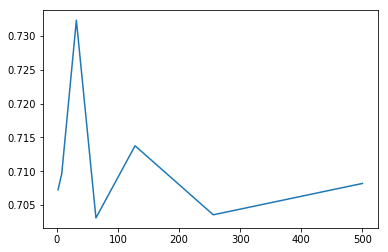

In [84]:
plt.plot(df_para.samples,scores_depth)
# plt.savefig("entropy_depth")
# plt.close()
# plt.show()

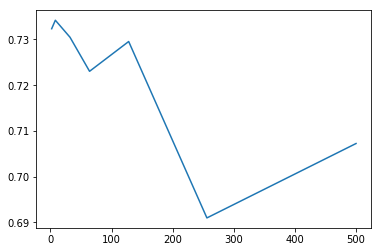

In [86]:
plt.plot(df_para.samples,scores_sample)
# plt.savefig("entropy_sample")
# plt.close()
plt.show()

In [87]:
def decisionTreeBest(df):
    
    kf = KFold(n_splits=3, random_state=0)
    
    result = []
    
    for train, test in kf.split(df):

        train_data = df.iloc[train,:]
        test_data =  df.iloc[test,:]

        trainx = train_data.iloc[:,1:(train_data.shape[1]-1)]
        trainy = train_data.iloc[:,train_data.shape[1]-1]

        testx = test_data.iloc[:,1:(test_data.shape[1]-1)]
        testy = test_data.iloc[:,test_data.shape[1]-1]

        model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4,min_samples_leaf=50)
        model.fit(trainx, trainy)
        result.append(model.score(testx, testy))
    return model
               
#     return np.average(result)
        

In [88]:
scores =[]
for indx,row in df_para.iterrows():
    scores.append(decisionTreeBest(df))
df_para['accuracy']=scores

df_para

,method,depth,samples,accuracy,accuracy_sample,accuracy_depth
0,entropy,1,2,"DecisionTreeClassifier(class_weight=None, crit...",0.732351,0.707253
1,entropy,2,8,"DecisionTreeClassifier(class_weight=None, crit...",0.734210,0.709580
2,entropy,4,32,"DecisionTreeClassifier(class_weight=None, crit...",0.730491,0.732351
3,entropy,8,64,"DecisionTreeClassifier(class_weight=None, crit...",0.723046,0.703076
4,entropy,16,128,"DecisionTreeClassifier(class_weight=None, crit...",0.729557,0.713760
5,entropy,32,256,"DecisionTreeClassifier(class_weight=None, crit...",0.690984,0.703539
6,entropy,64,500,"DecisionTreeClassifier(class_weight=None, crit...",0.707253,0.708181


In [132]:
m=decisionTreeBest(df)

In [133]:
len(m.feature_importances_)

166

In [135]:
features=df.columns[1:len(df.columns)-1]
def getFeatures(weights):
    df_w= pd.DataFrame(features)
    df_w.columns =['features']
    df_w['weight']=weights
    return df_w

In [136]:
df_weight = getFeatures(m.feature_importances_)

df_weight.to_csv("decision_tree.csv",index = False)

In [137]:
df_weight

,features,weight
0,age,0.000000
1,urea_n_min,0.000000
2,urea_n_max,0.000000
3,urea_n_mean,0.000000
4,resprate_min,0.000000
5,resprate_max,0.000000
6,resprate_mean,0.000000
7,glucose_min,0.000000
8,glucose_max,0.000000
9,glucose_mean,0.000000
